In [1]:
#Sentiment analysis ideas
#1. get sentiment of common phrases
#2. get sentiment split by persona 
#baseline imports 
import pandas as pd
import regex as re
import numpy as np
import spacy
from spacy.tokens import Doc
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.matcher import Matcher
from spacy.util import filter_spans
import re
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline

In [2]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [3]:
classifier("yeah I wish I was happy but I'm not")

[{'label': 'NEGATIVE', 'score': 0.9975515007972717}]

In [4]:
"""
Example of using stock transformers pipeline 
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
"""
#an attempt at writing the code using the new way of splitting when creating the document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

nlp = spacy.load("en_core_web_sm")

/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [5]:
#load in the data, create splits in the data according to three columns 
subsetDoc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"])

In [31]:
"""
#get lemmas split by values in the Touchpoint column 
#lemmaDict = subsetDoc.getColSubAttributeDict("Persona", "importantLemmas")
#subsetDoc.getFreqDict(subsetDoc.importantLemmas)[0]

freqDict = subsetDoc.getTopFew(subsetDoc.importantLemmas, 15)

#now find phrases corresponding to these terms 

#first pull apart dictionary 
freqKeys = sorted(list(freqDict.keys()),key=lambda x: freqDict[x], reverse=True)
freqVals = sorted(list(freqDict.values()), reverse=True)

#now grab all spans that contain freqKeys 
wordSpanDict = subsetDoc.getWordSpans(freqKeys)

#write an experimental version of the function here then integrate it 
#take a word -> spanList dictionary as input and output word -> sentiment dictionary 
def getWordSpanSent(inDict): 
    outDict = {}
    for word, spanList in inDict.items(): 
        sents = []
        for span in spanList: 
            classified = classifier(str(span))[0]
            if classified["label"] == "NEGATIVE": 
                sent = -float(classified["score"])
            else: 
                sent = float(classified["score"])
            sents.append(sent)
        outDict[word] = np.mean(sents)
    return outDict

wordSpanSents = getWordSpanSent(wordSpanDict)

ax = subsetDoc.FreqSentBarChart(freqDict, wordSpanSents)
ax.set_title("Top 10 Term Frequency Colored by Sentiment", size=23)
ax.set_xlabel("Number of Occurences", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenSentiment.jpg")
"""

'\n#get lemmas split by values in the Touchpoint column \n#lemmaDict = subsetDoc.getColSubAttributeDict("Persona", "importantLemmas")\n#subsetDoc.getFreqDict(subsetDoc.importantLemmas)[0]\n\nfreqDict = subsetDoc.getTopFew(subsetDoc.importantLemmas, 15)\n\n#now find phrases corresponding to these terms \n\n#first pull apart dictionary \nfreqKeys = sorted(list(freqDict.keys()),key=lambda x: freqDict[x], reverse=True)\nfreqVals = sorted(list(freqDict.values()), reverse=True)\n\n#now grab all spans that contain freqKeys \nwordSpanDict = subsetDoc.getWordSpans(freqKeys)\n\n#write an experimental version of the function here then integrate it \n#take a word -> spanList dictionary as input and output word -> sentiment dictionary \ndef getWordSpanSent(inDict): \n    outDict = {}\n    for word, spanList in inDict.items(): \n        sents = []\n        for span in spanList: \n            classified = classifier(str(span))[0]\n            if classified["label"] == "NEGATIVE": \n                se

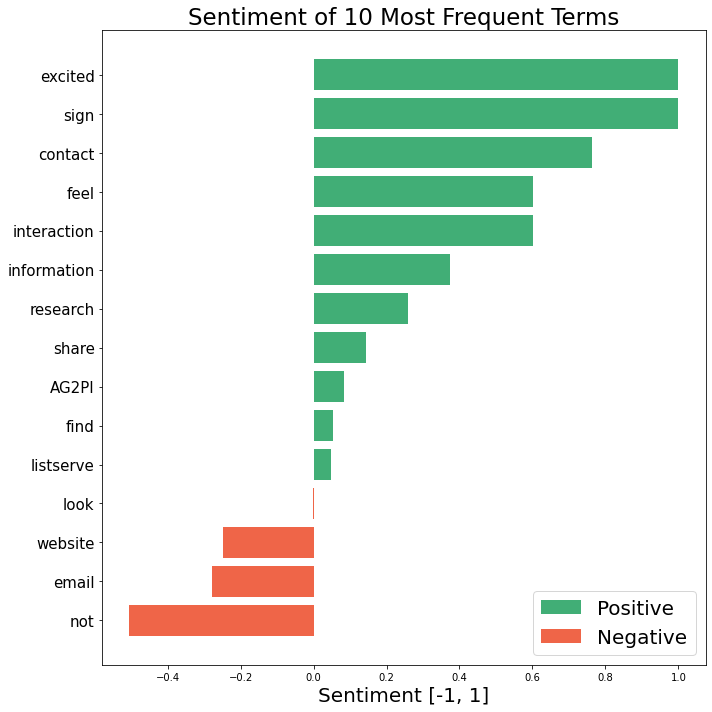

In [32]:
wordSpanSents
ax = subsetDoc.sentBarChart(wordSpanSents)

ax.set_title("Sentiment of 10 Most Frequent Terms", size=23)
ax.set_xlabel("Sentiment [-1, 1]", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
#plt.rcParams["legend.position"] = "left"
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenJUSTSentiment.jpg")

In [8]:
#NOTE: we can't really find strong sentiment for a lot of items based on looking at span.. most are neutral!

#get all spans 
allSpans = subsetDoc.getSpans(subsetDoc.workingDoc)
spanSents = classifier([str(item) for item in allSpans])

#the classification (pos, neg) as an int (1, 0)
spanClasses = [int(item["label"] == "POSITIVE") for item in spanSents]

#the classification (pos, neg) as an int (1, 0)
spanScores = [float(item["score"]) if item["label"] == "POSITIVE" else -float(item["score"]) for item in spanSents]

#NOTE: many of the sents seem to be fairly close to 1
spanDf = pd.DataFrame({"spans":[str(item) for item in allSpans], "scores":spanScores, "groundTruth":spanClasses})

In [9]:
#it is time consuming to look through these but they seem accurate for the more extreme cases in question 
spanDf.to_csv("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/spanClassifications.csv")

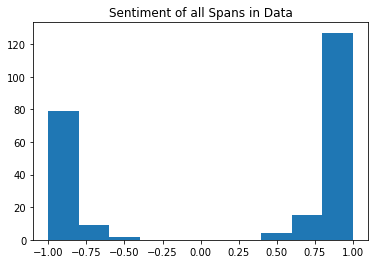

,spans,scores,groundTruth
66,Visually boring too long,-0.999798,0
191,Disappointed at lack of opportunity to share,-0.999795,0
185,Disappointed with lack of opportunity,-0.999793,0
222,No way to access to data about them and their ...,-0.999773,0
218,Feels left out because there is no way to lead...,-0.999767,0
...,...,...,...
30,Finds website full of fabulous information,0.999864,1
203,Professionally rewarding to see their work bei...,0.999873,1
28,Positive feelings throughout interaction,0.999874,1
227,Hopeful,0.999874,1


In [10]:
#get the most extreme sentances and plot them 

#visualize polarity 
#NOTE: this doesn't seem to line up very well with reality 
plt.hist(spanScores)
plt.title("Sentiment of all Spans in Data")
plt.show()

#NOTE: #items DO appear to be in the right order though 
spanDf.sort_values("scores")

In [11]:
def spaceSpans(inSpans): 
    outList = []
    spanDict = {}
    for span in inSpans:
        span = str(span)
        count = 0 
        #keep adding spaces to item until it does not exist in span dict 
        while count < len(inSpans):
            spacer = "".join([" " for temp in range(0, count)])
            newToken = spacer + str(span)
            if newToken not in spanDict:
                spanDict[newToken] = True
                outList.append(newToken)
                break
            count +=1 
    return outList
spaceSpans(allSpans)

['Boring emails that get buried in lost',
 'Contacting faculty that are involved in their institution',
 'Happy to discover that there is a group focusing on what she is looking for',
 'Time conflict no easily accessible link to more information if you cant make the meeting',
 'Connections and contacts with other research faculty',
 'New ideas',
 'Website for AG2PI that is loaded with details',
 'Signing up for list serves',
 'Email  calling Pis or admin support people',
 'Setting up the actual interaction is an interaction in itself  and can be positive or negative based on how easy it is to achieve',
 'Attending workshopsevents',
 'Making phone calls',
 'Reading emails  need to keep them engaging or at this point Susan will let emails float down to junk status',
 'Feel like a part of the team when reading from listserve',
 'Learning about the others in the group',
 'Attending a workshopmeeting',
 'Contributing to researchdiscussiondialogue',
 'Talking with leadershipother attendees',

In [12]:
#takes spans, creates a dataframe with scores and pos/neg label as integer
#then returns the top and bottom "numExamples" number of rows sorted by sentiment score 
def getExtremes(spanList, numExamples): 
    spanSents = classifier([str(item) for item in spanList])

    #the classification (pos, neg) as an int (1, 0)
    spanClasses = [int(item["label"] == "POSITIVE") for item in spanSents]

    #the classification (pos, neg) as an int (1, 0)
    spanScores = [float(item["score"]) if item["label"] == "POSITIVE" else -float(item["score"]) for item in spanSents]

    #NOTE: many of the sents seem to be fairly close to 1
    spanDf = pd.DataFrame({"spans":spaceSpans(spanList), "scores":spanScores, "groundTruth":spanClasses})
    spanDf = spanDf.sort_values("scores")
    dfLen = len(spanDf)
    print(dfLen)
    return (spanDf.iloc[0:numExamples,:], spanDf.iloc[dfLen-numExamples:dfLen])

extremeSent = getExtremes(allSpans, 7)

236


In [13]:
print(extremeSent)

(                                                 spans    scores  groundTruth
66                            Visually boring too long -0.999798            0
191       Disappointed at lack of opportunity to share -0.999795            0
185              Disappointed with lack of opportunity -0.999793            0
222  No way to access to data about them and their ... -0.999773            0
218  Feels left out because there is no way to lead... -0.999767            0
12   Reading emails  need to keep them engaging or ... -0.999767            0
60   AG2P website doesnt have a clear or any sectio... -0.999762            0,                                                  spans    scores  groundTruth
192             Feeling valued because of contribution  0.999842            1
193               Reflect positively on productiveness  0.999843            1
30          Finds website full of fabulous information  0.999864            1
203  Professionally rewarding to see their work bei...  0.9998

Text(0.5, 1.0, 'hello world')

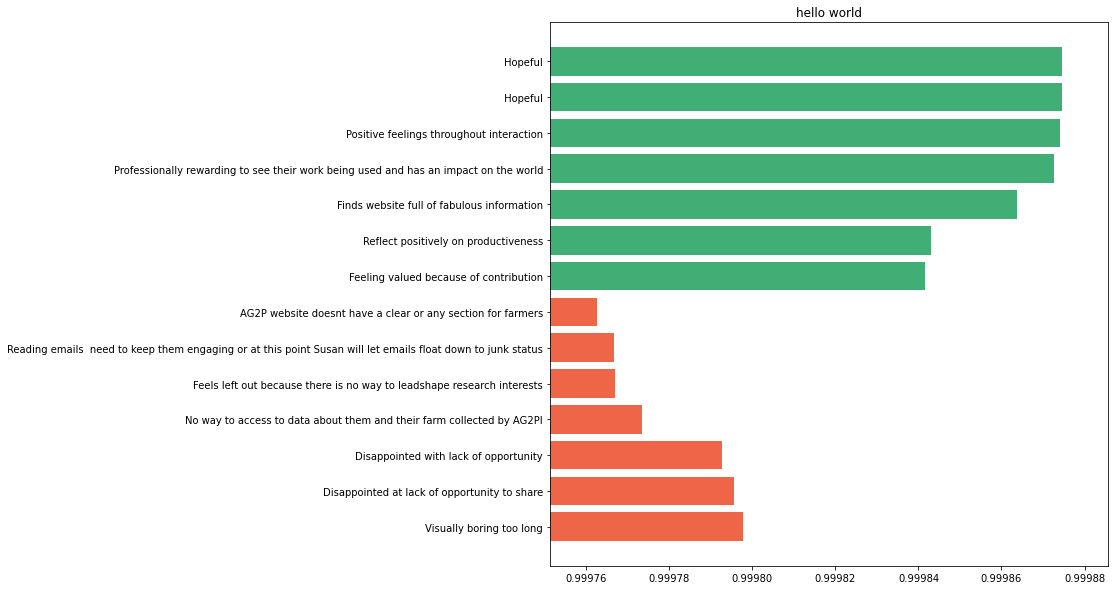

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
green = "#41ae76"
orange = "#ef6548"
colors = [orange for i in range(0, len(extremeSent[0]))] + [green for i in range(0, len(extremeSent[1]))]
ax.barh(pd.concat([extremeSent[0].spans, extremeSent[1].spans]), pd.concat([pd.Series([-item for item in extremeSent[0].scores]), extremeSent[1].scores]), color=colors)
xmin = min(pd.concat([pd.Series([-item for item in extremeSent[0].scores]), extremeSent[1].scores]))
xmax = max(pd.concat([pd.Series([-item for item in extremeSent[0].scores]), extremeSent[1].scores]))
xbuffer = .1 * (xmax-xmin)
ax.set_xlim(xmin-xbuffer, xmax+xbuffer)
ax.set_title("hello world")

In [15]:
item = pd.concat([pd.Series([-item for item in extremeSent[0].scores]), extremeSent[1].scores])
item

0      0.999798
1      0.999795
2      0.999793
3      0.999773
4      0.999767
5      0.999767
6      0.999762
192    0.999842
193    0.999843
30     0.999864
203    0.999873
28     0.999874
227    0.999874
174    0.999874
dtype: float64

In [16]:
num = 3
sortedDf = spanDf.sort_values("scores")
dfLen = len(sortedDf)
sortedDf.iloc[0:num]
sortedDf.iloc[dfLen-num:dfLen]


,spans,scores,groundTruth
28,Positive feelings throughout interaction,0.999874,1
227,Hopeful,0.999874,1
174,Hopeful,0.999874,1


In [17]:
sortedDf.iloc[236-3:236]

,spans,scores,groundTruth
28,Positive feelings throughout interaction,0.999874,1
227,Hopeful,0.999874,1
174,Hopeful,0.999874,1


In [18]:
xbot = min(pd.concat([pd.Series([-item for item in extremeSent[0].scores]), extremeSent[1].scores]))
xbot


0.9997624754905701

In [19]:
#NOW TIME TO REDO THE ANALYSES BUT EVERYTHING COMES FROM DOC OBJECT IF POSSIBLE 
"""
Example of using stock transformers pipeline 
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
"""
#an attempt at writing the code using the new way of splitting when creating the document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

nlp = spacy.load("en_core_web_sm")

#load in the data, create splits in the data according to three columns 
subsetDoc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"], sentAnalysis=True)

/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


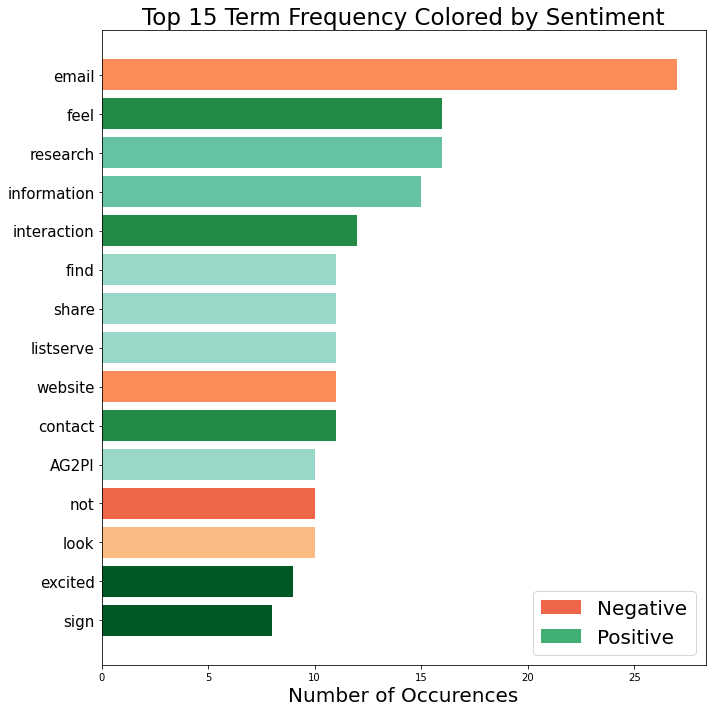

In [20]:

#get lemmas split by values in the Touchpoint column 
#get top 15 lemmas and their num of occurences 
freqDict = subsetDoc.getTopFew(subsetDoc.importantLemmas, 15)

#now find phrases corresponding to these terms 
#first pull apart dictionary 
sortedLists = subsetDoc.unZipFreqDict(freqDict)
freqKeys, freqVals = sortedLists

#now grab all spans that contain freqKeys 
wordSpanDict = subsetDoc.getWordSpans(freqKeys)

#get a dictionary of word -> avg sent of spans containing word 
wordSpanSents = subsetDoc.getWordSpanSent(wordSpanDict)

ax = subsetDoc.FreqSentBarChart(freqDict, wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Top 15 Term Frequency Colored by Sentiment", size=23)
ax.set_xlabel("Number of Occurences", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenSentiment.jpg")

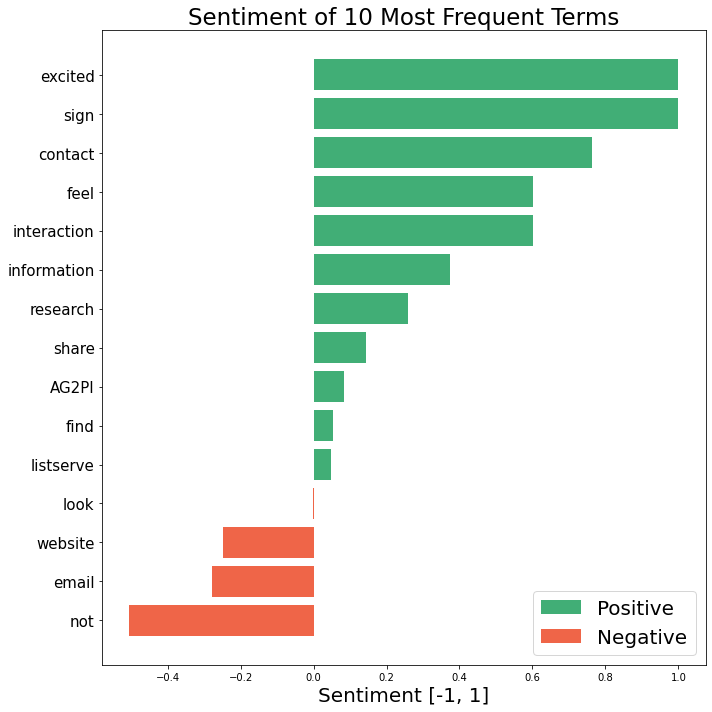

In [21]:
#wordSpanSents is the dict of words and sentiments from their spans. 
#this is all we need to make a bar chart of sentiments 

ax = subsetDoc.sentBarChart(wordSpanSents)

#START OF STYLING BY USER 
ax.set_title("Sentiment of 10 Most Frequent Terms", size=23)
ax.set_xlabel("Sentiment [-1, 1]", size=20)
ax.tick_params(axis="y", labelsize=15)
plt.rcParams["legend.fontsize"] = 20
#plt.rcParams["legend.position"] = "left"
plt.tight_layout()
plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/topTenJUSTSentiment.jpg")

In [22]:
#OK now group by persona or any other variable 
#NOW TIME TO REDO THE ANALYSES BUT EVERYTHING COMES FROM DOC OBJECT IF POSSIBLE 
allSpans = subsetDoc.getSpans(subsetDoc.workingDoc)
extremeSent = subsetDoc.getExtremes(allSpans, 7)

/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/DocumentWorking.py:846: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(newTicks)


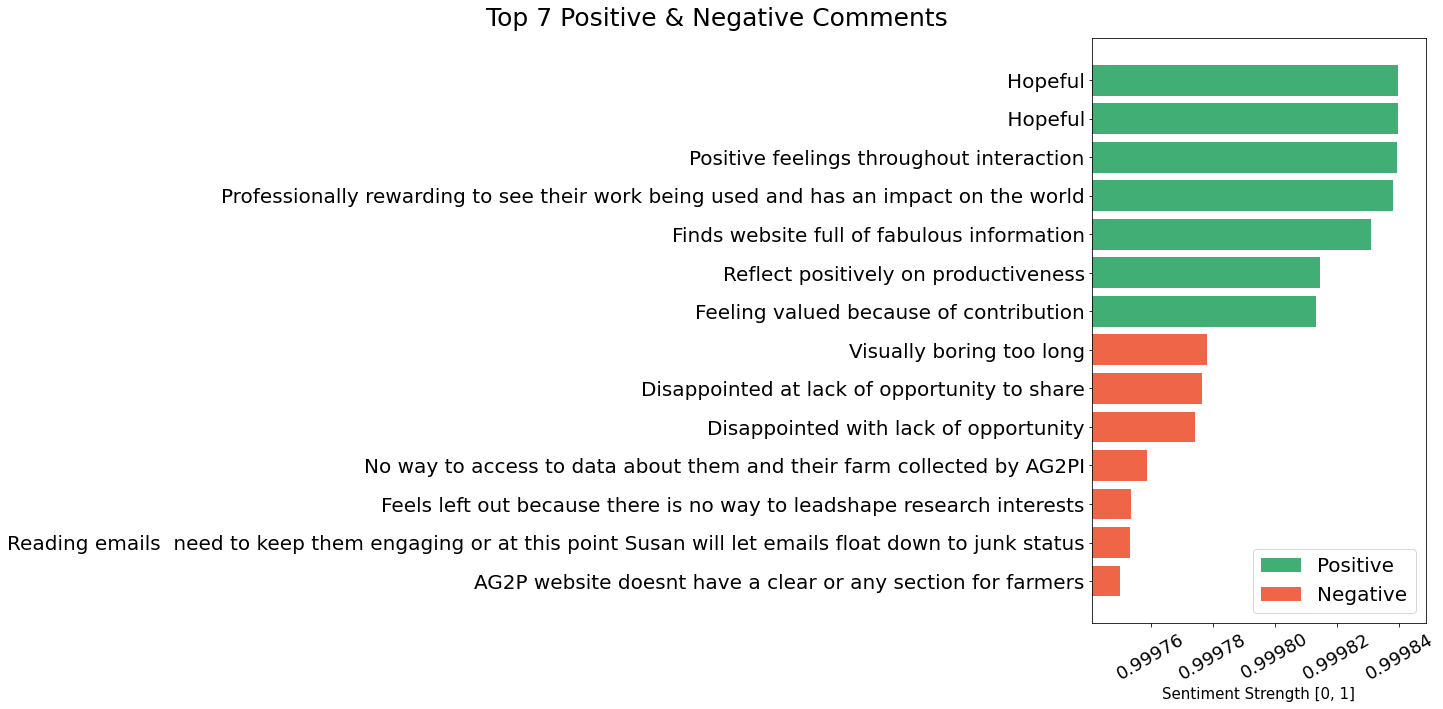

In [23]:
#version of sentiment figure but built into the document object 
#NOTE: figSize argument (width, height) has default value but we can override with figsize=(width, height)
#by passing that to the method below 
fig = subsetDoc.plotExtremes(extremeSent)
ax = fig.axes[0]

#START OF USER STYLING
fig.suptitle("Top 7 Positive & Negative Comments", size=25)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=18, rotation=30)
ax.set_xlabel("Sentiment Strength [0, 1]", size=15)

plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/extremePosNegClean.jpg", bbox_inches="tight")

In [24]:

"""
Example of using stock transformers pipeline 
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
"""
#an attempt at writing the code using the new way of splitting when creating the document object 
import importlib
imported_module = importlib.import_module("DocumentWorking")
importlib.reload(imported_module)
from DocumentWorking import *

nlp = spacy.load("en_core_web_sm")

#load in the data, create splits in the data according to three columns 
subsetDoc = Document("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/AG2PISlides.csv",nlp, subsetColumns=["Persona", "Engagement", "Touchpoint"], sentAnalysis=True)

/home/blitt/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [25]:
workingDocs = subsetDoc.getColSubAttributeDict("Persona", "workingDoc")

#now get spans from working documents dictionary
spanDict = subsetDoc.getSpans(workingDocs)

#a dictionary with keys as different personas, vals as tuples of dataframes 
#containing top # of pos, neg sentiments
extremesDict = subsetDoc.getExtremes(spanDict, 3)


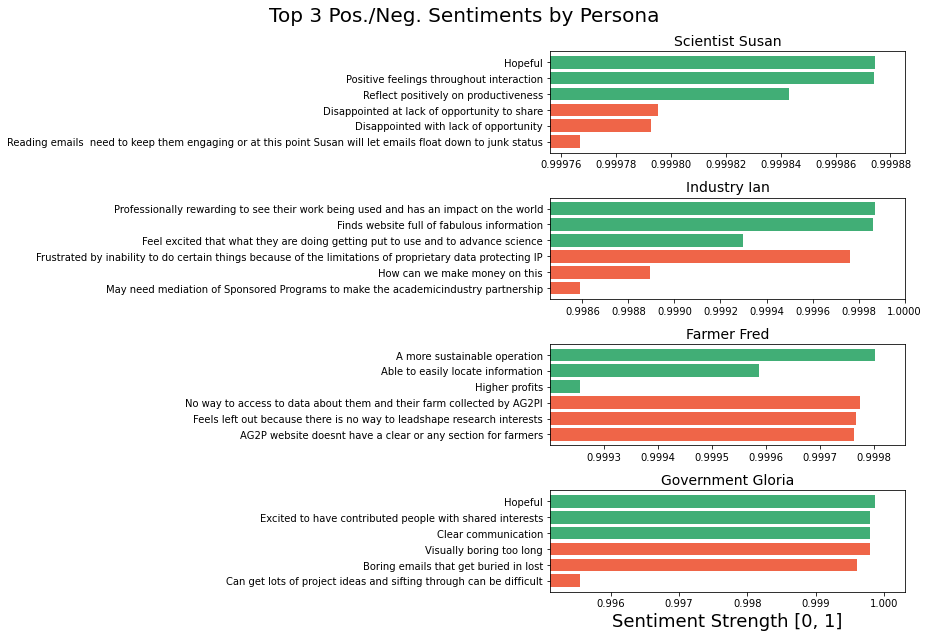

In [30]:
fig = subsetDoc.plotExtremes(extremesDict)
axs = fig.axes
axs[len(axs)-1].set_xlabel("Sentiment Strength [0, 1]", size=18)
fig.suptitle("Top 3 Pos./Neg. Sentiments by Persona", size = 20)
plt.tight_layout()
#plt.savefig("/home/blitt/Academic/PSC/NLPPipelines/AG2PIAnalytics/mockups/PersonaExtremePosNeg.jpg", bbox_inches="tight", dpi=1000)